In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [5]:
# "parse_dates" parameter converts the Date column to DatetimeIndex format (string by default)

df = pd.read_csv("stock_data.csv",
                parse_dates = True,
                index_col = "Date")

df.head(10)


,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA
2006-01-10,NaN,42.96,43.34,42.34,42.98,16288580,AABA
2006-01-11,NaN,42.19,42.31,41.72,41.87,26192772,AABA
2006-01-12,NaN,41.92,41.99,40.76,40.89,18921686,AABA
2006-01-13,NaN,41.00,41.08,39.62,39.90,30966185,AABA


In [7]:
df.drop(columns="Unnamed: 0", inplace=True)
df.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
2006-01-10,42.96,43.34,42.34,42.98,16288580,AABA
2006-01-11,42.19,42.31,41.72,41.87,26192772,AABA
2006-01-12,41.92,41.99,40.76,40.89,18921686,AABA
2006-01-13,41.00,41.08,39.62,39.90,30966185,AABA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


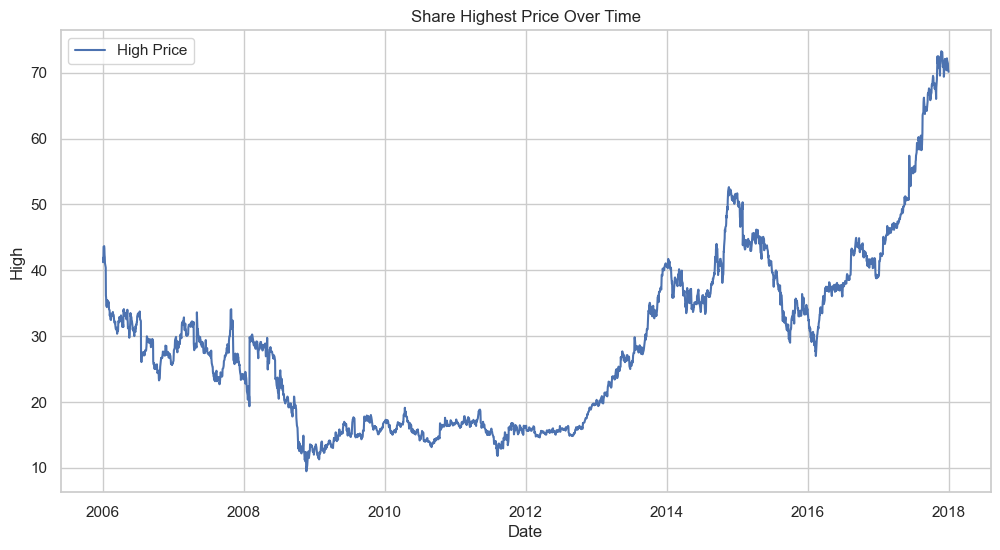

In [10]:
sns.set(style="whitegrid")    #setting style for a clean bg

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="High", label="High Price")

plt.xlabel("Date")
plt.ylabel("High")
plt.title("Share Highest Price Over Time")

plt.show()

# Resampling

**Resampling** refers to the process of changing the frequency of your time series data. This involves either increasing or decreasing the number of data points in your series.

### Why Resample:
- **Data Alignment:** Sometimes, you might need to combine or compare time series data that have different frequencies.For example, you might have sales data recorded daily and marketing campaign data recorded weekly. 
- **Feature Engineering:** Resampling can help create new features for machine learning models. For instance, you could downsample daily data to wekly averages, which might provide a more stable and less noisy input for your model.

### Types of Resampling:
- **Downsampling**: Reducing the frequency of your data. For example, converting daily data to weekly data. This usually involves aggregating the data (e.g., taking the average, sum, or maximum of the daily values to represent the weekly value).
- **Upsampling**: Increasing the frequency of your data. For example, converting monthly data to weekly data. This often involves interpolating or filling in the missing values between the original data points.

C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


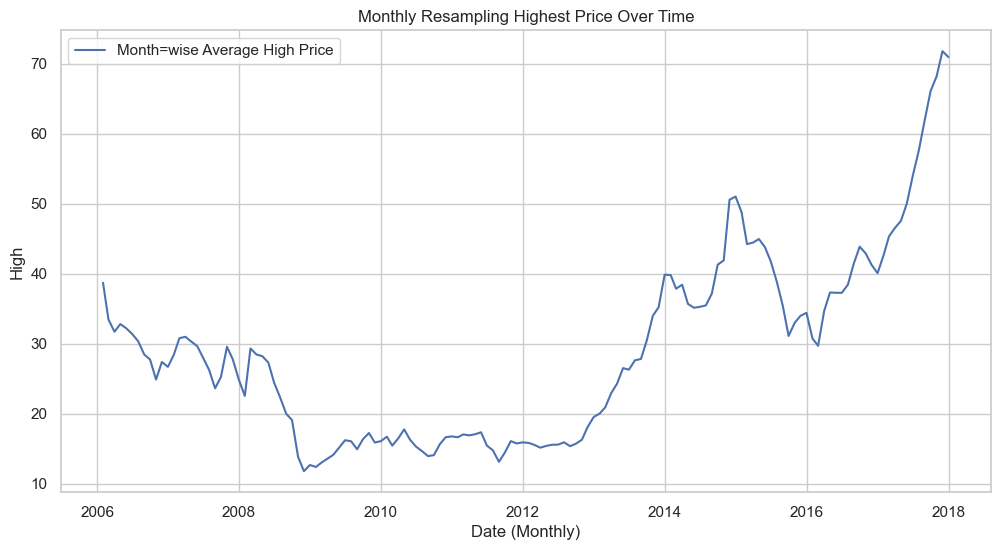

In [15]:
df_resampled = df.resample("ME").mean(numeric_only=True)   #resampling to monthly freq, using mean as aggregate function

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y="High", label="Month=wise Average High Price")

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()